In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data_df = pd.read_csv("survey_results_public.csv")
display(data_df.head())

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [4]:
# 1. Скільки респондентів пройшли опитування? Відповідь: 89184

print(data_df.shape)

(89184, 84)


In [5]:
print(data_df.ResponseId.nunique())

89184


In [6]:
# 2. Скільки респондентів відповіли на всі запитання? Відповідь: 0

data_all = data_df.dropna()
print(data_all.shape)

(0, 84)


In [7]:
print(data_df.columns.sort_values())

Index(['AIAcc', 'AIBen', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith',
       'AINextNeither different nor similar', 'AINextSomewhat different',
       'AINextSomewhat similar', 'AINextVery different', 'AINextVery similar',
       'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AISelect',
       'AISent', 'AIToolCurrently Using', 'AIToolInterested in Using',
       'AIToolNot interested in Using', 'Age', 'BuyNewTool',
       'CodingActivities', 'CompTotal', 'ConvertedCompYearly', 'Country',
       'Currency', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'DevType', 'EdLevel', 'Employment', 'Frequency_1', 'Frequency_2',
       'Frequency_3', 'ICorPM', 'Industry', 'Knowledge_1', 'Knowledge_2',
       'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6',
       'Knowledge_7', 'Knowledge_8', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LearnCode', 'LearnCodeCoursesCert',
       'LearnCodeOnline', 'MainBranch', 'MiscTechHaveWorkedWith',
       'MiscTec

In [8]:
print(data_df.describe())

         ResponseId     CompTotal       WorkExp  ConvertedCompYearly
count  89184.000000  4.822500e+04  43579.000000         4.801900e+04
mean   44592.500000  1.036807e+42     11.405126         1.031101e+05
std    25745.347541  2.276847e+44      9.051989         6.814188e+05
min        1.000000  0.000000e+00      0.000000         1.000000e+00
25%    22296.750000  6.300000e+04      5.000000         4.390700e+04
50%    44592.500000  1.150000e+05      9.000000         7.496300e+04
75%    66888.250000  2.300000e+05     16.000000         1.216410e+05
max    89184.000000  5.000000e+46     50.000000         7.435143e+07


In [9]:
# 3. Які значення мір центральної тенденції для досвіду (WorkExp) респондентів? 
# Середнє арифметичне (Mean): 11,41
# Медіана (Median): 9
# Мода (Mode): 5

print(data_df[['WorkExp']].agg(['mean', 'median']).round(2))
print(data_df[['WorkExp']].mode())

        WorkExp
mean      11.41
median     9.00
   WorkExp
0      5.0


In [10]:
# 4. Скільки респондентів працює віддалено? Відповідь: 30566

remote = data_df[data_df['RemoteWork'] == 'Remote']['RemoteWork'].count()
print(remote)

30566


In [11]:
# 5. Який відсоток респондентів програмує на Python? Відповідь: 49.53 %

python = data_df[data_df['LanguageHaveWorkedWith'].str.contains('python', case=False, na=False)]
python_percent = python['LanguageHaveWorkedWith'].count() / data_df['LanguageHaveWorkedWith'].count() * 100
print(python_percent.round(2))

49.53


In [12]:
# 6. Скільки респондентів навчалося програмувати за допомогою онлайн курсів? Відповідь: 77027

online = data_df[data_df['LearnCode'].str.contains('online', case=False, na=False)]['LearnCode'].count()
print(online)

77027


In [13]:
online = data_df[data_df['LearnCode'].str.contains('online courses', case=False, na=False)]['LearnCode'].count()
print(online)

43201


In [14]:
# 7. Яка середня та медіанна сума компенсації в кожній країні серед респондентів, що програмують на Python?

data = python.dropna(subset=['ConvertedCompYearly'])
display(data.groupby('Country')[['ConvertedCompYearly']].agg(['mean', 'median']).round(2))

ConvertedCompYearly         
                                                    mean   median
Country                                                          
Afghanistan                                       665.00     48.0
Albania                                         28008.60  11844.0
Algeria                                          8336.33   6586.0
Andorra                                         32127.00  32127.0
Angola                                            662.00    662.0
...                                                  ...      ...
Venezuela, Bolivarian Republic of...            24973.53  12000.0
Viet Nam                                        20191.87  13401.0
Yemen                                            8373.00   9000.0
Zambia                                          13051.00   9687.0
Zimbabwe                                         5600.00   6000.0

[158 rows x 2 columns]

In [15]:
# 8. Які рівні освіти мають 5 респондентів з найбільшою компенсацією?

sorted_df = data_df[['ConvertedCompYearly', 'EdLevel']].sort_values(by='ConvertedCompYearly', ascending=False)
display(sorted_df.head())

,ConvertedCompYearly,EdLevel
53268,74351432.0,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)"
77848,73607918.0,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)"
66223,72714292.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
28121,57513831.0,Primary/elementary school
19679,36573181.0,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)"


In [16]:
# Бонусне запитання: який відсоток респондентів програмує на Python в кожній віковій категорії?

python_group = python.groupby('Age')[['LanguageHaveWorkedWith']].count()
data_group = data_df.groupby('Age')[['LanguageHaveWorkedWith']].count()
display((python_group / data_group * 100).round(2))

,LanguageHaveWorkedWith
Age,
18-24 years old,63.05
25-34 years old,48.36
35-44 years old,42.23
45-54 years old,39.36
55-64 years old,37.70
65 years or older,32.88
Prefer not to say,57.63
Under 18 years old,71.23


In [17]:
# Серед респондентів, що знаходяться в 75 перцентилі за компенсацією і працюють віддалено, 
# які індустрії є найрозповсюдженішими?

df = data_df[(data_df.ConvertedCompYearly > data_df.ConvertedCompYearly.quantile(0.75)) & (data_df.RemoteWork == 'Remote')]
print(df.Industry.value_counts())

Industry
Information Services, IT, Software Development, or other Technology    1800
Financial Services                                                      535
Other                                                                   441
Healthcare                                                              365
Retail and Consumer Services                                            243
Manufacturing, Transportation, or Supply Chain                          168
Advertising Services                                                    121
Insurance                                                                96
Higher Education                                                         65
Legal Services                                                           21
Oil & Gas                                                                17
Wholesale                                                                11
Name: count, dtype: int64


In [18]:
display(df.Industry.value_counts().reset_index())

,Industry,count
0,"Information Services, IT, Software Development...",1800
1,Financial Services,535
2,Other,441
3,Healthcare,365
4,Retail and Consumer Services,243
5,"Manufacturing, Transportation, or Supply Chain",168
6,Advertising Services,121
7,Insurance,96
8,Higher Education,65
9,Legal Services,21


In [19]:
# wide формат (широкий)

table = data_df.pivot_table(values='ConvertedCompYearly', index='Industry', columns='RemoteWork', margins=True)
table.sort_values(by='All', ascending=False).round(2)

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote,All
Industry,,,,
Financial Services,141774.78,90478.50,113122.26,123991.59
Advertising Services,111253.82,92037.16,118059.63,112913.85
Healthcare,90572.27,69786.77,120466.59,103612.91
Insurance,79140.38,210505.46,106415.60,100515.55
Other,95243.69,76022.79,114206.27,99894.70
All,101715.55,67408.07,106620.25,99046.97
Retail and Consumer Services,97491.72,59691.59,107105.09,98233.88
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49,94930.76
"Manufacturing, Transportation, or Supply Chain",95708.63,67075.54,99358.95,90024.65


In [20]:
# long формат використовують для побудови графіків і діаграм!

data_df.groupby(['Industry', 'RemoteWork'], as_index = False)[['ConvertedCompYearly']].mean().round(2)

,Industry,RemoteWork,ConvertedCompYearly
0,Advertising Services,"Hybrid (some remote, some in-person)",111253.82
1,Advertising Services,In-person,92037.16
2,Advertising Services,Remote,118059.63
3,Financial Services,"Hybrid (some remote, some in-person)",141774.78
4,Financial Services,In-person,90478.50
5,Financial Services,Remote,113122.26
6,Healthcare,"Hybrid (some remote, some in-person)",90572.27
7,Healthcare,In-person,69786.77
8,Healthcare,Remote,120466.59
9,Higher Education,"Hybrid (some remote, some in-person)",71734.46


In [21]:
import seaborn as sns

<Axes: xlabel='RemoteWork', ylabel='Industry'>

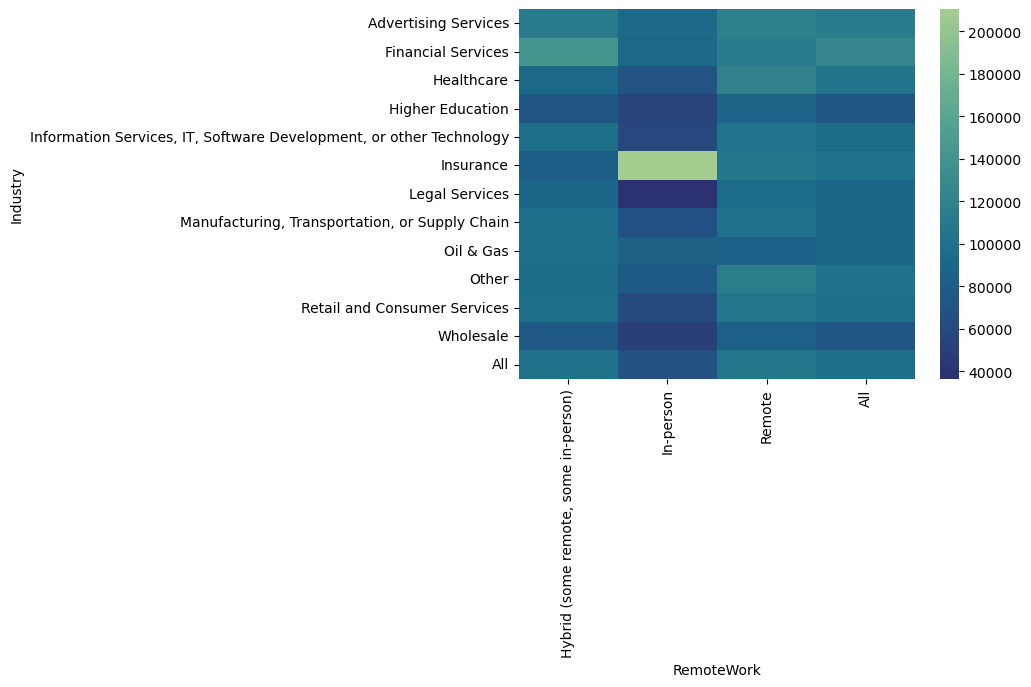

In [22]:
sns.heatmap(data=table, cmap='crest_r')